In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1 #


In [2]:
v=[1,48,5,-3,501,56,41,36,7,-10]


In [3]:
def burbsort(v):
    for i in range(1,len(v)):
        for j in range(0,len(v)-i):
            if (v[j+1]<v[j]):
                aux=v[j]
                v[j]=v[j+1]
                v[j+1]=aux
    return v

In [4]:
burbsort(v)

[-10, -3, 1, 5, 7, 36, 41, 48, 56, 501]

# Ejercicio 2

In [30]:
def SerieExp(x):
    err=1
    Suma=1 #e^0
    i=1
    while err>0.001:
        Sumant=Suma
        Suma+=(x**i/np.math.factorial(i))
        # err=(Suma-Sumant)
        err = np.abs((Suma-Sumant)/Sumant)
        print(err)
        i+=1
        #return Suma #MDFCOMMENT el return siempre sale de la funcion,
    return Suma # return debe ejecutar solo cuando salis del while !

In [31]:
SerieExp(0.5)

0.5
0.08333333333333333
0.012820512820512775
0.0015822784810127033
0.00015797788309635752


1.6486979166666667

In [32]:
np.exp(0.5)

1.6487212707001282

# Ejercicio 3 #

In [33]:
g=10
m=70
gamma=12.5
def VPar(t):
    v=(g*m/gamma)*(1-np.exp(-(gamma/m)*t))
    return v

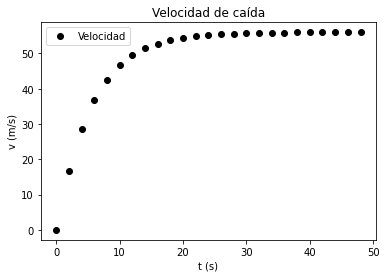

In [34]:
V=[]
T=[]
for t in range(0,50,2):
    T.append(t)
    V.append(VPar(t))
plt.plot(T,V,'ok', label="Velocidad")
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('Velocidad de caída')
plt.legend();

# Ejercicio 4 #

In [35]:
import numpy as np

In [36]:
A = np.array(
    [
        [1, -3, -2],
        [2, -4, -3],
        [-3, 6, 8]
    ]
)

b= np.array([[6],[8],[-5]])

In [37]:
x=np.linalg.solve(A,b) #biblioteca numpy, subpaquete linalg y usa el modulo solve

In [38]:
print(x)

[[ 1.]
 [-3.]
 [ 2.]]


In [39]:
A.dot(x)-b

array([[0.],
       [0.],
       [0.]])

# Ejercicio 5 #

In [40]:
z,T=np.loadtxt('DATOS_Guia0_Problema6.dat', unpack=True) #unpack me lo separa en dos vectores 
print("Z = ", z)
print("T = ", T)

Z =  [0.  0.5 1.  1.5 2.  2.5 3. ]
T =  [70. 68. 55. 22. 13. 11. 10.]


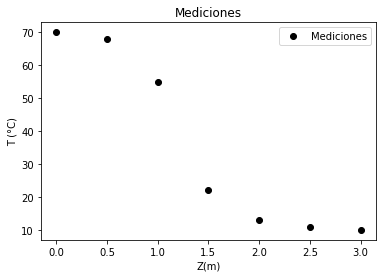

In [15]:
plt.plot(z,T, 'ok', label="Mediciones")
plt.xlabel('Z(m)')
plt.ylabel('T (°C)')
plt.title('Mediciones')
plt.legend(); #Pone el cartelito de la serie que grafique

Repasito Splines:  Pido un polinomio que pase por un par de punts. 1 poli para cada inervalo. saco el di (ver pdf splines). Ademas le pido que sean continuos-> sistema de ecs entre el poli del intervalo i y el del intervalo i+1. el polinomio que llega al 2do punto por ejemplo, debe tener el mismo valor que el polinomio en ese punto pero del siguiente intervalo. Deben ser continuos y dos vees derivables. Obtengo sist de ecs, pero me sobran incognitas(hallar coefs de polinomios)--> esas 2 ecuaciones que me faltan provienen de las condiciones de contorno, las elijo en temrino de las derivadas segundas en los extremos del itnervalo: pido derivada segunda nula al principio y al final de mis puntos, al hacer esto puedo definir un intervalo extra como si agregara 2 puntos mas en mis extremos pero solo me va aimportar la derivada segunda que llega al primer punto y la uqe sale del segundo punto. Esta pendiente es la que pido que sea bn=0 b1=0 (coef de la derivada segunda es el bi) Ahroa tengo la misma antidad de escuaciones que de incognitas. Escribo las ecuaciones en funcion de los coef b de los polinomios, lo reescribo de manera lineal.  

In [41]:
h=[]
for i in range (0,len(z)-1):
        h.append(z[i+1]-z[i]) #append:agrego al final de la lista h el valor calculado en cada iteración.
# truquito:
# h = np.diff(z)

In [42]:
print(h)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [43]:
#A=np.zeros((len(z),len(z)))
A=np.eye(len(z))
y=np.zeros((len(z),1))

In [44]:
for i in range (1,len(z)-1):
    A[i,i]=2*(h[i]+h[i-1])
    A[i,i+1]=h[i]
    A[i,i-1]=h[i-1]
    y[i]=3*(((T[i+1]-T[i])/h[i])-((T[i]-T[i-1])/h[i-1]))
print(A)
print(y)


[[1.  0.  0.  0.  0.  0.  0. ]
 [0.5 2.  0.5 0.  0.  0.  0. ]
 [0.  0.5 2.  0.5 0.  0.  0. ]
 [0.  0.  0.5 2.  0.5 0.  0. ]
 [0.  0.  0.  0.5 2.  0.5 0. ]
 [0.  0.  0.  0.  0.5 2.  0.5]
 [0.  0.  0.  0.  0.  0.  1. ]]
[[   0.]
 [ -66.]
 [-120.]
 [ 144.]
 [  42.]
 [   6.]
 [   0.]]


In [45]:
np.savetxt('matriz ejercicio 6',A)
np.savetxt('vector b ej 6',y)

In [46]:
b=np.linalg.solve(A,y)
print(b)

[[  0.        ]
 [-13.01538462]
 [-79.93846154]
 [ 92.76923077]
 [ -3.13846154]
 [  3.78461538]
 [ -0.        ]]


In [47]:
np.savetxt('solucion ejercicio 6,b', b) # por favor eviemos acentos y comas en nombres de archivos!

In [53]:
d=T
a=[]
c=[]

In [54]:
for i in range(0,len(z)-1):
    a.append((1/3)*(b[i+1]-b[i])/h[i])
    c.append(((T[i+1]-T[i])/h[i])-b[i]*h[i]-(a[i]*h[i]**2))
print(c)


[array([-1.83076923]), array([-8.33846154]), array([-54.81538462]), array([-48.4]), array([-3.58461538]), array([-3.26153846])]


<div style="background:#666600">b es un vector columna por lo tanto b[i] es un array (el de la fila). podemos achatar c para que te quede bien:</div>

In [57]:
c.ravel()

array([ -1.83076923,  -8.33846154, -54.81538462, -48.4       ,
        -3.58461538,  -3.26153846])

<div style="background:#666600">o llamar a b con los dos índices:</div>

In [58]:
d=T
a=[]
c=[]

In [59]:
for i in range(0,len(z)-1):
    a.append((1/3)*(b[i+1,0]-b[i,0])/h[i])
    c.append(((T[i+1]-T[i])/h[i])-b[i,0]*h[i]-(a[i]*h[i]**2))
print(c)


[-1.830769230769231, -8.338461538461537, -54.815384615384616, -48.400000000000006, -3.584615384615385, -3.261538461538461]


<div style="background:#666600">fijate por favor los valores en los ejemplos en clase !</div>


# Ejercicio 7

## Metodo del trapecio 

In [25]:
paso=0.1
Int=0
z=np.linspace(0,30,paso):
    #Int+=200*(z/(5+z)*np.exp(-2*z/30))


SyntaxError: invalid syntax (313034537.py, line 3)